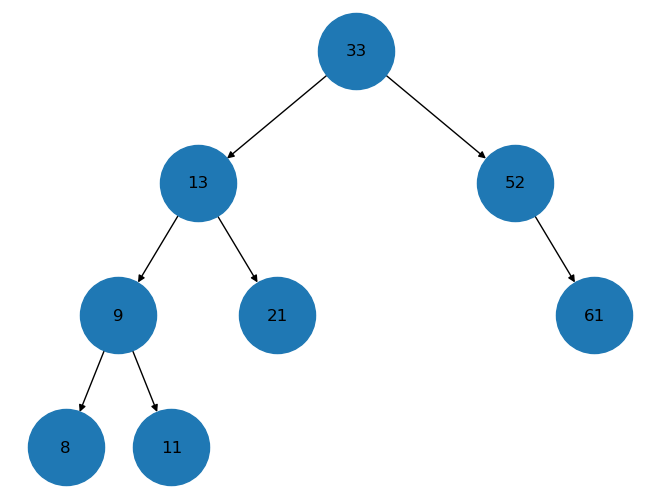

In [8]:
"""
Tipos de Árvores

            Árvore AVL

Árvores AVL são um tipo específico de árvores binárias de busca 
auto-balanceáveis. Elas têm esse nome em homenagem a seus inventores, 
Adelson-Velsky e Landis. O principal motivo para usar uma árvore AVL, 
ou qualquer árvore auto-balanceável, é manter a eficiência das operações de 
busca, inserção e remoção.

Por que usar Árvores AVL?

    - Balanceamento: Em árvores binárias de busca (ABB), as operações de 
    busca, inserção e remoção têm eficiência O(log⁡n) quando a árvore é 
    balanceada. No entanto, no pior caso (quando a árvore se degenera em uma 
    lista ligada), estas operações podem levar tempo O(n). As árvores AVL 
    garantem que a árvore permanece balanceada após cada inserção ou remoção, 
    garantindo assim a eficiência de O(log⁡n) para operações fundamentais.

    - Pesquisa Eficiente: Devido ao balanceamento, a pesquisa em uma árvore AVL é 
    muito rápida, tornando-a adequada para dicionários e tabelas de símbolos.

    - Inserção e Remoção Eficientes: Embora as árvores AVL necessitem de rebalanceamento 
    após inserções e remoções, essas operações ainda são realizadas de forma eficiente.

Utilidades na Vida Real:

    - Bancos de Dados: Muitos sistemas de gerenciamento de bancos de dados usam 
    árvores AVL ou outras árvores auto-balanceáveis para manter índices balanceados, 
    garantindo consultas rápidas.

    - Sistemas de arquivos: Alguns sistemas de arquivos utilizam árvores AVL para 
    manter os metadados dos arquivos organizados, permitindo acesso rápido aos dados.

    - Tabelas de Símbolos em Compiladores: Durante a compilação, os compiladores usam 
    tabelas de símbolos para armazenar informações sobre identificadores no código. 
    As árvores AVL podem ser usadas para implementar essas tabelas de símbolos, garantindo 
    buscas rápidas e inserções eficientes.

    - Aplicações de Rede: Árvores AVL podem ser usadas em aplicações que requerem pesquisas 
    rápidas em grandes conjuntos de dados, como roteadores ou balanceadores de carga que 
    precisam consultar tabelas de encaminhamento.

    - Balanceamento de Carga: Em alguns sistemas, as árvores AVL podem ser usadas para 
    manter um balanceamento de carga eficiente entre diferentes recursos ou servidores.

Resumindo, a principal utilidade das árvores AVL é garantir que as operações em uma árvore 
binária de busca sejam executadas de forma eficiente, evitando os cenários de pior caso que 
poderiam degradar a performance. Esta garantia de desempenho é crucial em muitos sistemas em 
tempo real e aplicações onde a eficiência é fundamental.
"""

# Importa a biblioteca networkx, que fornece estruturas de 
# dados para grafos (redes) e operações relacionadas.
# Pode ser usada para representar árvores, redes, etc.
import networkx as nx

# Importa a biblioteca matplotlib.pyplot, uma biblioteca gráfica 
# usada para criar gráficos e visualizações.
# Neste contexto, pode ser usada para visualizar a árvore.
import matplotlib.pyplot as plt

# Define uma nova classe chamada 'No'.
class No:
    
    # Define o método construtor da classe.
    # Este método é chamado quando uma nova instância da classe é criada.
    def __init__(self, valor):
        
        # Define um atributo chamado 'valor' para o objeto e atribui o 
        # valor passado como argumento.
        self.valor = valor
        
        # Define um atributo chamado 'altura' para o objeto e o inicializa com 1.
        # Em uma árvore AVL, a altura é usada para verificar o balanceamento.
        self.altura = 1
        
        # Define um atributo chamado 'esquerdo' para o objeto.
        # Isso servirá para apontar para o filho esquerdo deste nó.
        # Ele é inicializado como None, indicando que não há filho esquerdo no início.
        self.esquerdo = None
        
        # Define um atributo chamado 'direito' para o objeto.
        # Isso servirá para apontar para o filho direito deste nó.
        # Ele é inicializado como None, indicando que não há filho direito no início.
        self.direito = None


# Define uma nova classe chamada 'ArvoreAVL' que representará a árvore AVL.
class ArvoreAVL:
    
    # Define o método construtor da classe.
    # Este método é chamado quando uma nova instância da classe é criada.
    def __init__(self):
        
        # Define um atributo chamado 'raiz' para a árvore e o inicializa como None.
        # Isso indica que, inicialmente, a árvore AVL não tem nenhum nó (está vazia).
        self.raiz = None

    # Define o método 'inserir' que será usado para inserir um novo valor na árvore.
    def inserir(self, valor):
        
        # O valor a ser inserido é passado como argumento.
        
        # Chama o método privado '_inserir_recursivo' para inserir o valor de forma recursiva.
        # O método '_inserir_recursivo' irá retornar a nova raiz após a inserção, que pode
        # ou não ser diferente da raiz atual, dependendo se houver rotações para manter o balanceamento.
        # A raiz atualizada é então atribuída ao atributo 'raiz' da árvore.
        self.raiz = self._inserir_recursivo(self.raiz, valor)

    """
    "Recursiva" refere-se a uma técnica em programação e matemática 
    em que uma função ou método chama a si mesmo diretamente ou indiretamente. 
    A recursão é usada para resolver problemas que podem ser divididos em 
    subproblemas menores de natureza semelhante.
    """
        
    # Define um método privado chamado '_inserir_recursivo' que insere um valor na árvore de forma recursiva.
    def _inserir_recursivo(self, no_atual, valor):
        
        # Se o nó atual (onde estamos tentando inserir) não existir,
        # isso significa que encontramos uma posição vazia e, portanto,
        # criamos um novo nó com o valor e o retornamos.
        if not no_atual:
            return No(valor)

        # Se o valor a ser inserido for menor que o valor no nó atual,
        # movemos recursivamente para a subárvore à esquerda.
        elif valor < no_atual.valor:            
            no_atual.esquerdo = self._inserir_recursivo(no_atual.esquerdo, valor)
            
        # Caso contrário, movemos para a subárvore à direita.
        else:
            no_atual.direito = self._inserir_recursivo(no_atual.direito, valor)

        # Atualiza a altura do nó atual com base na altura máxima de suas subárvores
        # e adiciona 1 para contar o nó atual.
        no_atual.altura = 1 + max(self._obter_altura(no_atual.esquerdo),
                                  self._obter_altura(no_atual.direito))

        # Calcula o fator de equilíbrio do nó atual. Este fator indica se
        # o nó está desequilibrado após a inserção.
        equilibrio = self._obter_equilibrio(no_atual)

        # Se o nó estiver desequilibrado para a esquerda (fator > 1) e 
        # o valor a ser inserido for menor que o filho esquerdo do nó atual,
        # realiza uma rotação simples à direita.
        if equilibrio > 1 and valor < no_atual.esquerdo.valor:
            return self._rotacionar_direita(no_atual)

        # Se o nó estiver desequilibrado para a direita (fator < -1) e
        # o valor a ser inserido for maior que o filho direito do nó atual,
        # realiza uma rotação simples à esquerda.
        if equilibrio < -1 and valor > no_atual.direito.valor:
            return self._rotacionar_esquerda(no_atual)

        # Se o nó estiver desequilibrado para a esquerda, mas o valor a ser inserido
        # for maior que o filho esquerdo, realiza uma rotação dupla esquerda-direita.
        if equilibrio > 1 and valor > no_atual.esquerdo.valor:
            no_atual.esquerdo = self._rotacionar_esquerda(no_atual.esquerdo)
            return self._rotacionar_direita(no_atual)

        # Se o nó estiver desequilibrado para a direita, mas o valor a ser inserido
        # for menor que o filho direito, realiza uma rotação dupla direita-esquerda.
        if equilibrio < -1 and valor < no_atual.direito.valor:
            no_atual.direito = self._rotacionar_direita(no_atual.direito)
            return self._rotacionar_esquerda(no_atual)

        # Se o nó não estiver desequilibrado, simplesmente retorna o nó atual.
        return no_atual


    # Define um método privado chamado '_rotacionar_esquerda' que realiza uma rotação à esquerda em um nó desequilibrado.
    def _rotacionar_esquerda(self, no_atual):
        
        # 'no_aux' é a referência ao filho direito do 'no_atual'.
        # Este será o nó que tomará o lugar do 'no_atual' após a rotação.
        no_aux = no_atual.direito

        # 'no_temp' é a referência ao filho esquerdo do 'no_aux'.
        # Depois da rotação, esse nó se tornará o filho direito do 'no_atual'.
        no_temp = no_aux.esquerdo

        # Move o 'no_atual' para ser o filho esquerdo de 'no_aux'.
        no_aux.esquerdo = no_atual

        # Move 'no_temp' (antigo filho esquerdo de 'no_aux') para ser o 
        # filho direito de 'no_atual'.
        no_atual.direito = no_temp

        # Atualiza a altura do 'no_atual' após a rotação.
        # O '1 +' é usado para adicionar a altura do próprio nó,
        # e o 'max' é usado para obter a altura máxima entre seus dois filhos.
        no_atual.altura = 1 + max(self._obter_altura(no_atual.esquerdo),
                                  self._obter_altura(no_atual.direito))

        # Similarmente, atualiza a altura do 'no_aux'.
        no_aux.altura = 1 + max(self._obter_altura(no_aux.esquerdo),
                                self._obter_altura(no_aux.direito))

        # Retorna 'no_aux' que agora é o nó raiz do subárvore balanceada.
        return no_aux


    # Define um método privado chamado '_rotacionar_direita' que realiza 
    # uma rotação à direita em um nó desequilibrado.
    def _rotacionar_direita(self, no_atual):
        
        # 'no_aux' é a referência ao filho esquerdo do 'no_atual'.
        # Este será o nó que tomará o lugar do 'no_atual' após a rotação.
        no_aux = no_atual.esquerdo

        # 'no_temp' é a referência ao filho direito do 'no_aux'.
        # Depois da rotação, esse nó se tornará o filho esquerdo do 'no_atual'.
        no_temp = no_aux.direito

        # Move o 'no_atual' para ser o filho direito de 'no_aux'.
        no_aux.direito = no_atual

        # Move 'no_temp' (antigo filho direito de 'no_aux') para ser o 
        # filho esquerdo de 'no_atual'.
        no_atual.esquerdo = no_temp

        # Atualiza a altura do 'no_atual' após a rotação.
        # O '1 +' é usado para adicionar a altura do próprio nó,
        # e o 'max' é usado para obter a altura máxima entre seus dois filhos.
        no_atual.altura = 1 + max(self._obter_altura(no_atual.esquerdo),
                                  self._obter_altura(no_atual.direito))

        # Similarmente, atualiza a altura do 'no_aux'.
        no_aux.altura = 1 + max(self._obter_altura(no_aux.esquerdo),
                                self._obter_altura(no_aux.direito))

        # Retorna 'no_aux' que agora é o nó raiz do subárvore balanceada.
        return no_aux


    # Define um método privado chamado '_obter_altura' para obter a altura de um determinado nó.
    def _obter_altura(self, no):
        
        # Se o nó for None (ou seja, um nó vazio ou não existente),
        # a altura é considerada como 0.
        if not no:
            return 0

        # Se o nó existir, retorna o valor da altura armazenado no nó.
        return no.altura

    # Define um método privado chamado '_obter_equilibrio' para obter o fator de equilíbrio de um nó.
    def _obter_equilibrio(self, no):
        
        # Se o nó for None (ou seja, um nó vazio ou não existente),
        # o fator de equilíbrio é considerado como 0.
        if not no:
            return 0

        # Calcula o fator de equilíbrio do nó subtraindo a altura de seu filho esquerdo 
        # pela altura de seu filho direito. Um valor positivo indica que a subárvore esquerda
        # é mais alta, enquanto um valor negativo indica que a subárvore direita é mais alta.
        return self._obter_altura(no.esquerdo) - self._obter_altura(no.direito)


    def plotar(self):
        
        # Cria um novo gráfico direcionado (DiGraph) usando a biblioteca networkx.
        # Este gráfico vai representar a nossa árvore.
        grafo = nx.DiGraph()

        # Chama a função '_gerar_grafico' para adicionar os nós e arestas ao gráfico 'grafo'
        # baseado na estrutura da árvore AVL começando pelo nó raiz.
        self._gerar_grafico(grafo, self.raiz)

        # Gera as posições para cada nó da árvore para que possam ser plotados corretamente.
        # A função '_posicionar_nos' provavelmente determina a posição de cada nó 
        # de forma que a árvore seja visualmente clara e estruturada.
        posicoes = self._posicionar_nos(self.raiz)

        # Utiliza a função 'draw' da biblioteca networkx para visualizar o gráfico.
        # 'pos=posicoes' define a posição de cada nó.
        # 'with_labels=True' indica que os nós serão etiquetados com seus respectivos valores.
        # 'arrows=True' indica a direção das arestas (já que é um DiGraph).
        # 'node_size=3000' define o tamanho visual de cada nó.
        nx.draw(grafo, pos=posicoes, with_labels=True, arrows=True, node_size=3000)

        # Exibe o gráfico/árvore usando a biblioteca matplotlib.
        plt.show()


    def _gerar_grafico(self, grafo, no):
        
        # Verifica se o nó atual (no) é válido (não é None).
        # Esta é a condição base para a recursão.
        if no:

            # Verifica se o nó atual tem um filho à esquerda.
            if no.esquerdo:
                
                # Se sim, adiciona uma aresta ao gráfico 'grafo' conectando o nó atual 
                # ao seu filho esquerdo. A ordem é importante, pois estamos trabalhando 
                # com um gráfico direcionado e a aresta vai do nó atual (pai) para o nó esquerdo (filho).
                grafo.add_edge(no.valor, no.esquerdo.valor)

                # Chamada recursiva para continuar a construção do gráfico para o subárvore à esquerda.
                # Isso garante que todos os nós e arestas da subárvore esquerda sejam adicionados ao gráfico.
                self._gerar_grafico(grafo, no.esquerdo)

            # Verifica se o nó atual tem um filho à direita.
            if no.direito:
                
                # Se sim, adiciona uma aresta ao gráfico 'grafo' conectando o nó atual 
                # ao seu filho direito. A ordem é importante, pois estamos trabalhando 
                # com um gráfico direcionado e a aresta vai do nó atual (pai) para o nó direito (filho).
                grafo.add_edge(no.valor, no.direito.valor)

                # Chamada recursiva para continuar a construção do gráfico para o subárvore à direita.
                # Isso garante que todos os nós e arestas da subárvore direita sejam adicionados ao gráfico.
                self._gerar_grafico(grafo, no.direito)


    def _posicionar_nos(self, no, nivel=0, pos={}, x=0):
        
        # Verifica se o nó atual (no) é válido (não é None).
        # Esta é a condição base para a recursão.
        if no:
            
            # Posiciona o nó atual (no) nas coordenadas (x, -nivel) no gráfico.
            # O valor -nivel é usado para garantir que os nós mais profundos na árvore 
            # apareçam mais abaixo no gráfico.
            pos[no.valor] = (x, -nivel)

            # Verifica se o nó atual tem um filho à esquerda.
            if no.esquerdo:
                
                # Se sim, faz uma chamada recursiva para posicionar os nós da subárvore esquerda.
                # Incrementa o nível (nivel) pois está indo mais fundo na árvore.
                # Ajusta a posição x subtraindo 1/(nivel+1) para mover os nós para a esquerda no gráfico 
                # e garantir que os nós não se sobreponham.
                pos = self._posicionar_nos(no.esquerdo, nivel + 1, pos, x - 1/(nivel+1))

            # Verifica se o nó atual tem um filho à direita.
            if no.direito:
                
                # Se sim, faz uma chamada recursiva para posicionar os nós da subárvore direita.
                # Incrementa o nível (nivel) pois está indo mais fundo na árvore.
                # Ajusta a posição x adicionando 1/(nivel+1) para mover os nós para a direita no gráfico 
                # e garantir que os nós não se sobreponham.
                pos = self._posicionar_nos(no.direito, nivel + 1, pos, x + 1/(nivel+1))

        # Retorna o dicionário 'pos', que contém as posições de todos os nós processados até agora.
        return pos


# Cria uma instância da classe ArvoreAVL, inicializando uma árvore AVL vazia.
arvore = ArvoreAVL()

# Uma lista de valores inteiros a serem inseridos na árvore AVL.
valores = [33, 13, 52, 9, 21, 61, 8, 11]
# valores = [50, 5, 12, 19, 23, 56, 90, 75, 10, 20, 30, 40]

# Itera sobre cada valor na lista de 'valores'.
for valor in valores:
    
    # Insere o valor atual na árvore AVL.
    # Se a árvore se tornar desequilibrada após a inserção,
    # ela será automaticamente reequilibrada (devido à natureza AVL).
    arvore.inserir(valor)

# Após inserir todos os valores da lista, plota a árvore AVL usando 
# a função 'plotar' da classe ArvoreAVL.
# A função 'plotar' exibirá visualmente a estrutura da árvore AVL 
# com os nós e suas conexões.
arvore.plotar()